In [2]:
library("MASS")
data <- mammals
print(data)

                              body   brain
Arctic fox                   3.385   44.50
Owl monkey                   0.480   15.50
Mountain beaver              1.350    8.10
Cow                        465.000  423.00
Grey wolf                   36.330  119.50
Goat                        27.660  115.00
Roe deer                    14.830   98.20
Guinea pig                   1.040    5.50
Verbet                       4.190   58.00
Chinchilla                   0.425    6.40
Ground squirrel              0.101    4.00
Arctic ground squirrel       0.920    5.70
African giant pouched rat    1.000    6.60
Lesser short-tailed shrew    0.005    0.14
Star-nosed mole              0.060    1.00
Nine-banded armadillo        3.500   10.80
Tree hyrax                   2.000   12.30
N.A. opossum                 1.700    6.30
Asian elephant            2547.000 4603.00
Big brown bat                0.023    0.30
Donkey                     187.100  419.00
Horse                      521.000  655.00
European he

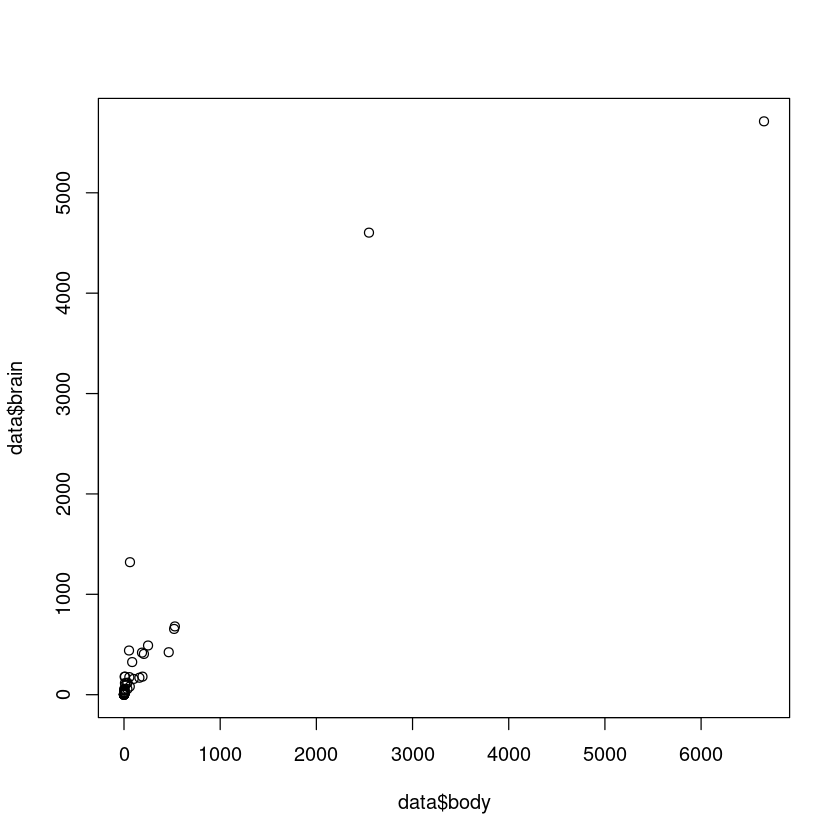

In [3]:
plot(data$body,data$brain)

Наскільки ми бачимо наші дані знаходяться не дуже лінійно, а також є декіька помітних викидів

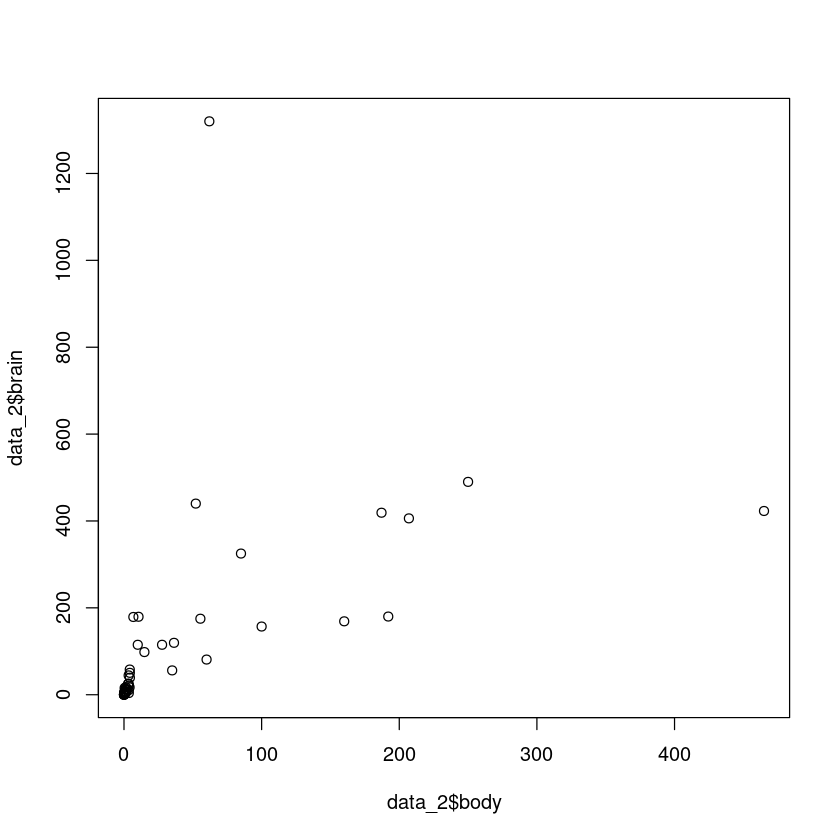

In [4]:
data_2 <- data[data$body< unname(quantile(data$body,prob = 0.95)),]
plot(data_2$body,data_2$brain)

Розділимо наші дані не тестову і навчальну частину

In [5]:
library(caTools)
set.seed(1)
sample <- sample.split(data$brain, SplitRatio = 0.7)
train  <- subset(data, sample == TRUE)
test   <- subset(data, sample == FALSE)

Спробуємо спрогнозувати один параметр за допомогою іншого

In [6]:
model = lm(brain~body,data=train)
summary(model)


Call:
lm(formula = brain ~ body, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-803.64 -100.13  -91.36  -45.65 2045.42 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 102.94215   62.49216   1.647    0.107    
body          0.96374    0.05712  16.872   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 397.8 on 41 degrees of freedom
Multiple R-squared:  0.8741,	Adjusted R-squared:  0.871 
F-statistic: 284.7 on 1 and 41 DF,  p-value: < 2.2e-16


Спробуємо тепер пролагарифмувати дані

In [7]:
model_log <- lm(log(brain)~log(body),data = train)
summary(model_log)


Call:
lm(formula = log(brain) ~ log(body), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73439 -0.51355 -0.08379  0.47792  1.94335 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.15976    0.12285   17.58   <2e-16 ***
log(body)    0.74683    0.03569   20.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7389 on 41 degrees of freedom
Multiple R-squared:  0.9144,	Adjusted R-squared:  0.9123 
F-statistic: 437.9 on 1 and 41 DF,  p-value: < 2.2e-16


Тепер спробуємо зробити те ж саме, але для даних без викидів

In [8]:
library(caTools)
set.seed(1)
sample <- sample.split(data_2$brain, SplitRatio = 0.7)
train_2  <- subset(data_2, sample == TRUE)
test_2  <- subset(data_2, sample == FALSE)

In [9]:
model_2 = lm(brain~body,data=train_2)
summary(model_2 )


Call:
lm(formula = brain ~ body, data = train_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-157.474  -25.235  -20.904   -2.744  315.715 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   26.490     12.200   2.171   0.0362 *  
body           1.875      0.199   9.423 1.73e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 70.42 on 38 degrees of freedom
Multiple R-squared:  0.7003,	Adjusted R-squared:  0.6924 
F-statistic:  88.8 on 1 and 38 DF,  p-value: 1.733e-11


In [10]:
model_log_2 = lm(log(brain)~log(body),data=train_2)
summary(model_log_2)


Call:
lm(formula = log(brain) ~ log(body), data = train_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72534 -0.49326 -0.07273  0.51921  1.59762 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.13669    0.11807   18.10   <2e-16 ***
log(body)    0.75803    0.04333   17.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.722 on 38 degrees of freedom
Multiple R-squared:  0.8895,	Adjusted R-squared:  0.8866 
F-statistic:   306 on 1 and 38 DF,  p-value: < 2.2e-16


In [11]:
y_real <- test$brain
y_real_2 <-test_2$brain

Намалюємо графіки залишків

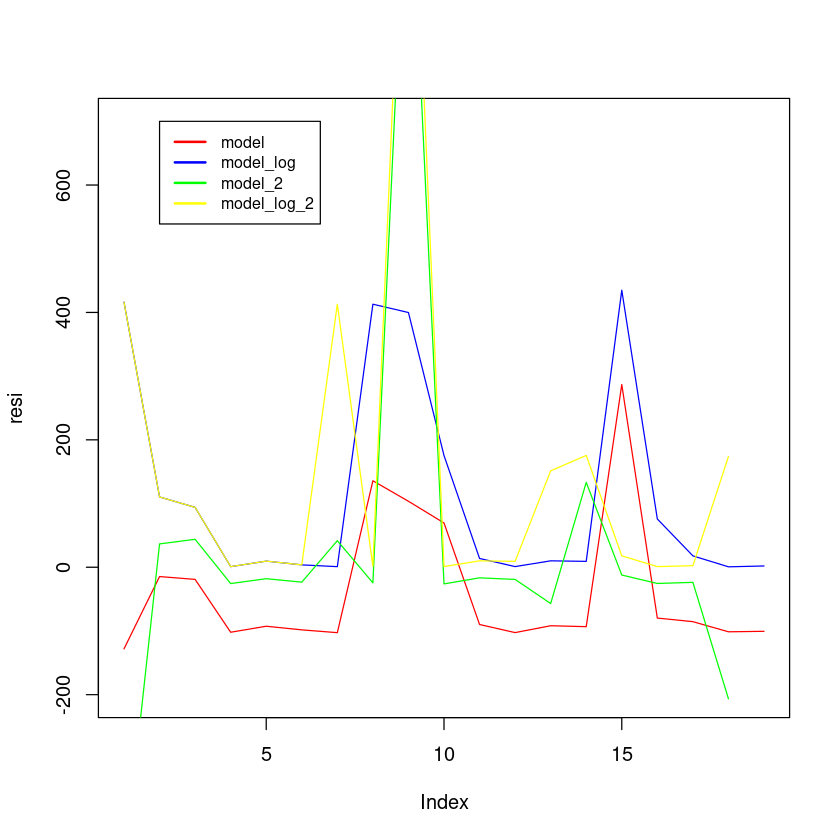

In [12]:
resi<-y_real-predict(model,test)
resi_log<-y_real-predict(model_log,test)
resi_2<- y_real_2-predict(model_2,test_2)
resi_2_log<-y_real_2-predict(model_log_2,test_2)

plot(resi,type="l",col="red",ylim = c(-200,700))
lines(resi_log,col="blue")
lines(resi_2,col="green")
lines(resi_2_log,col="yellow")
legend(2, 700, legend=c("model", "model_log","model_2","model_log_2"),
       col=c("red", "blue","green","yellow"),lwd =2,cex=0.8)

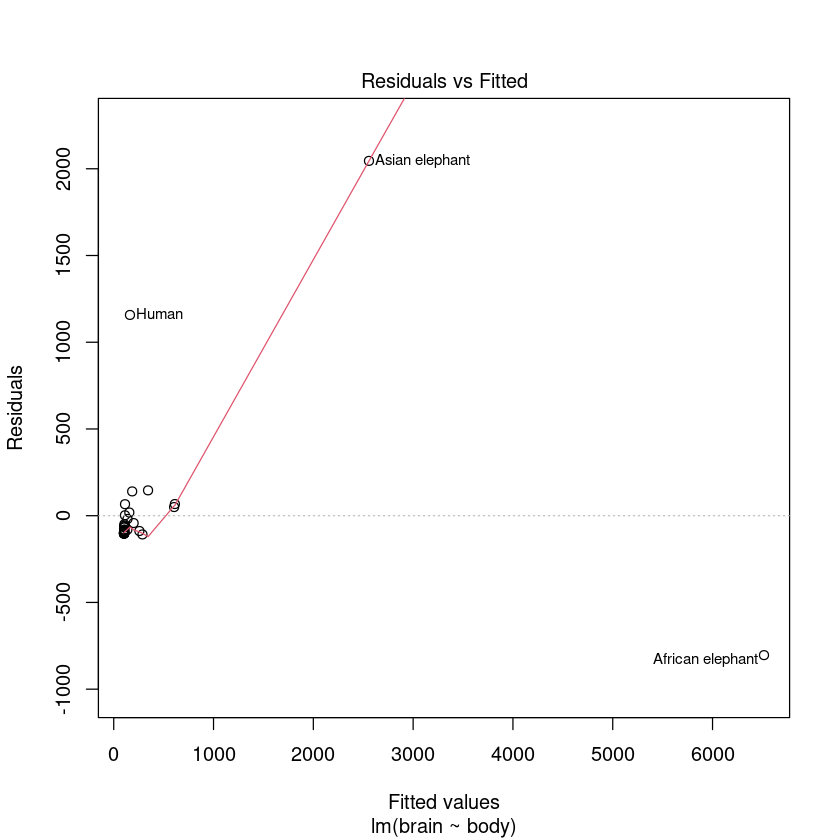

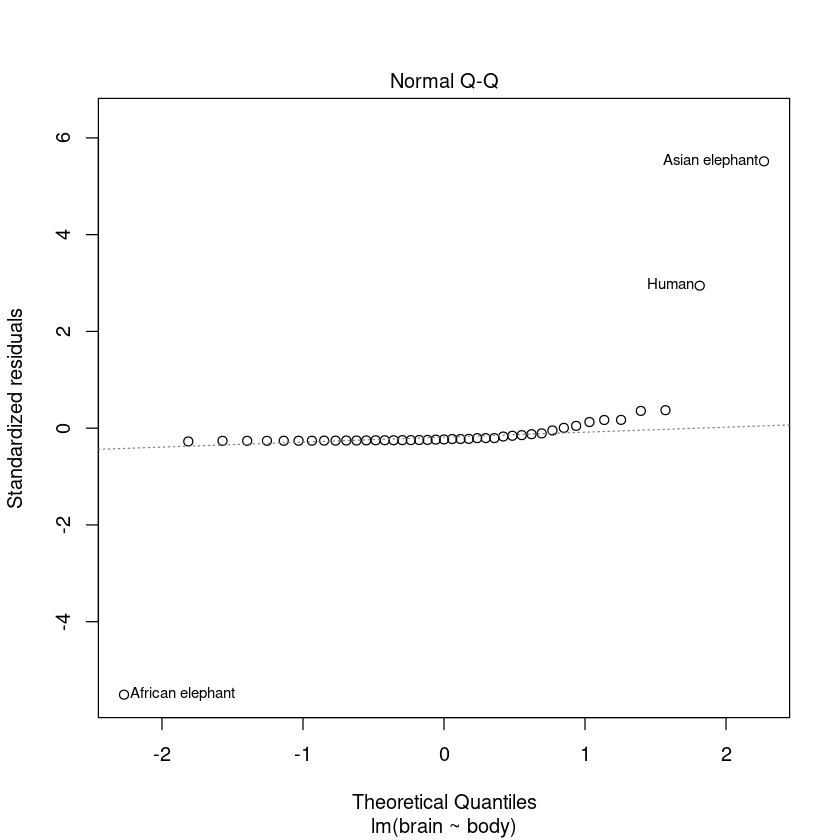

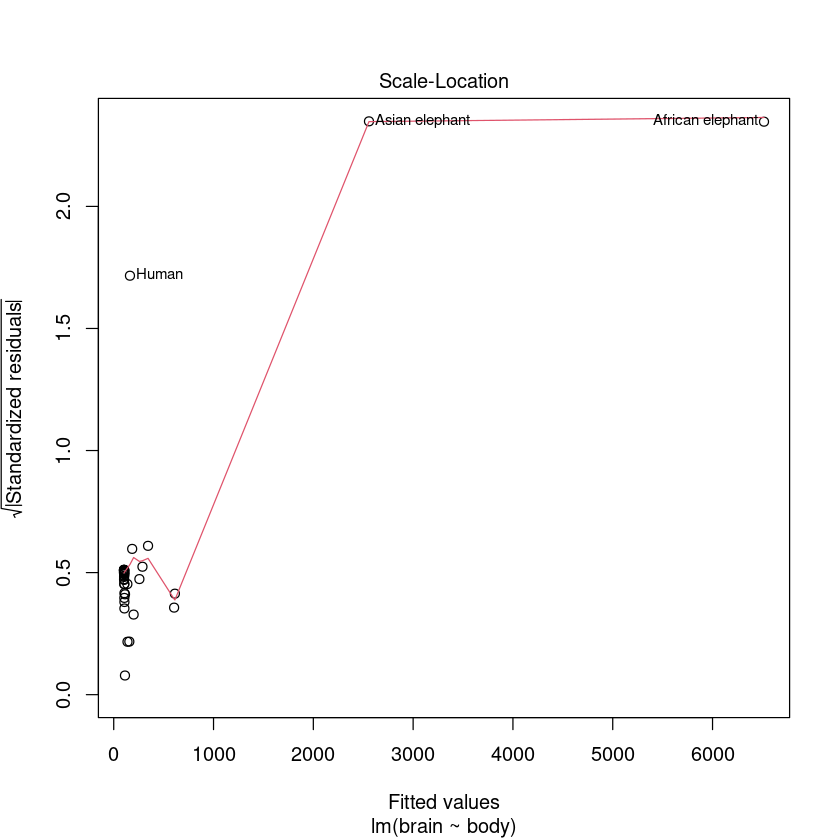

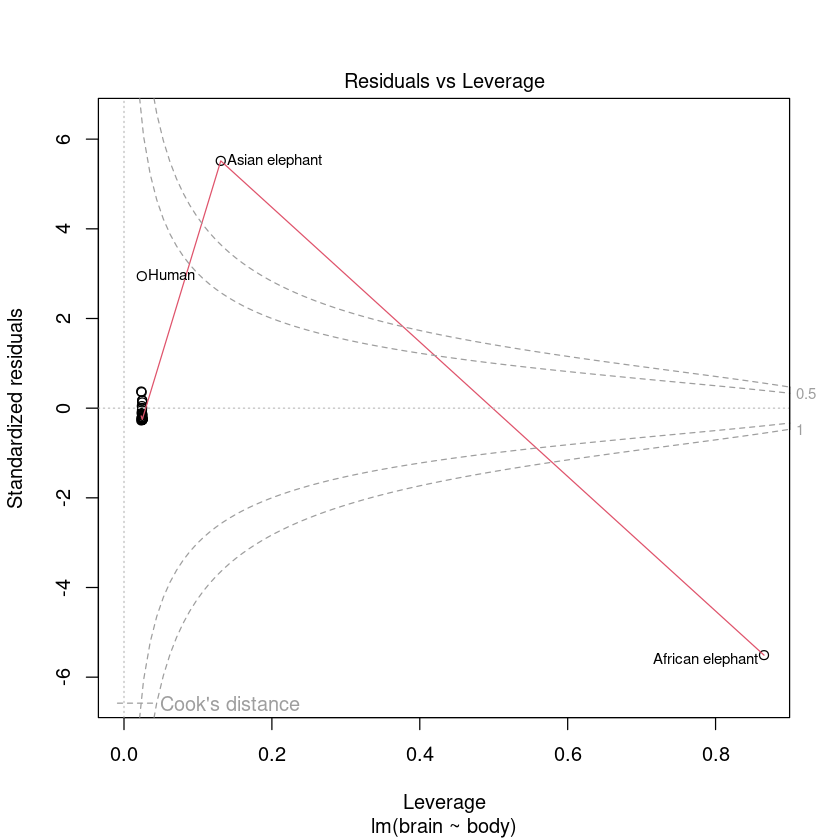

In [13]:
plot(model)

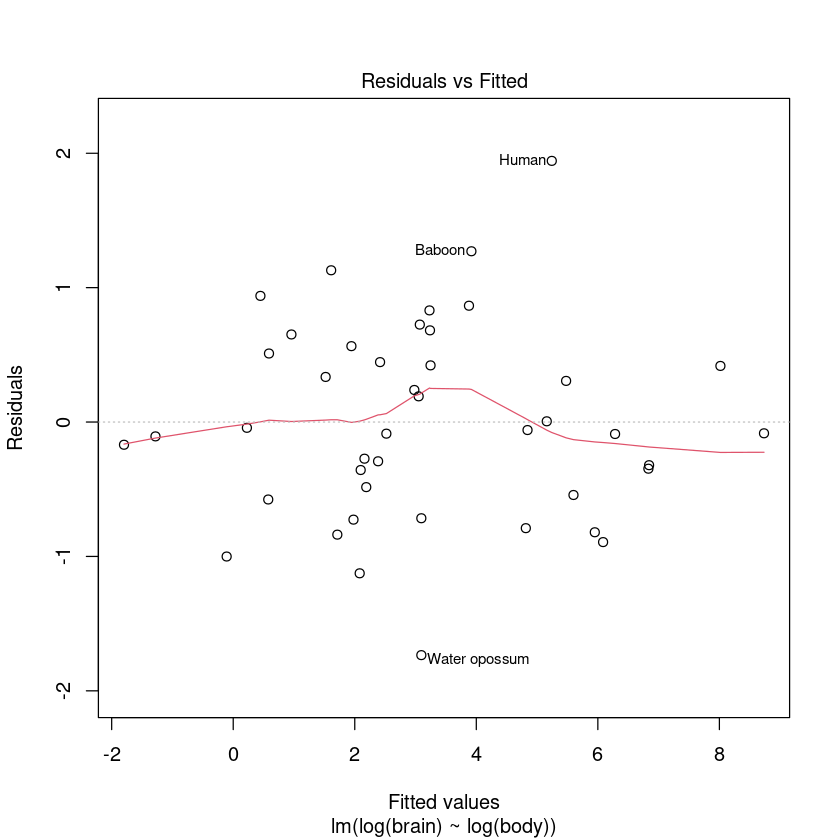

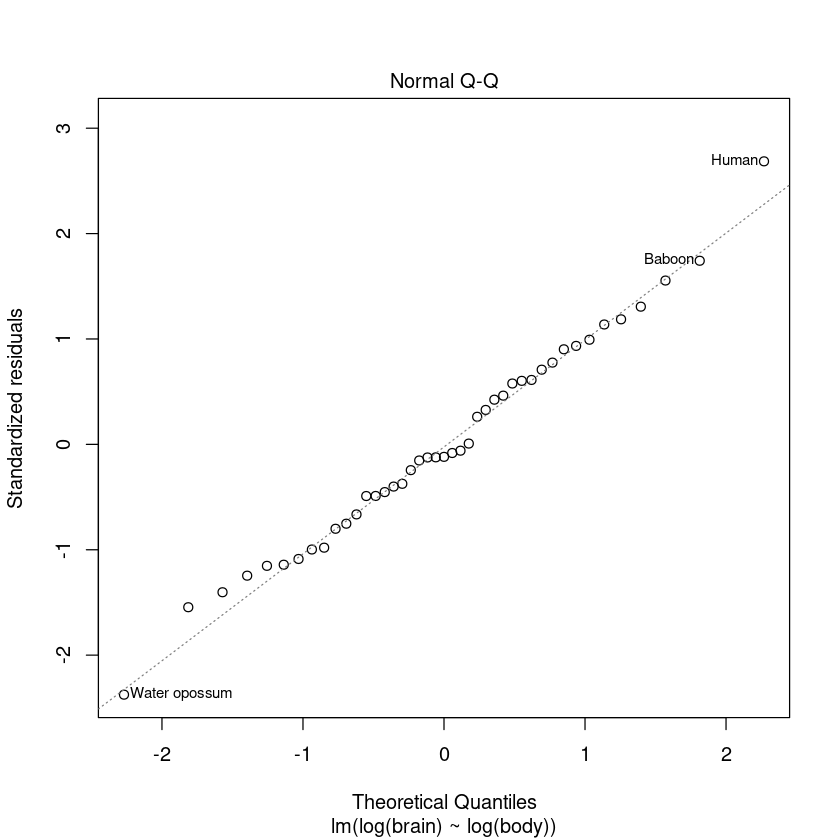

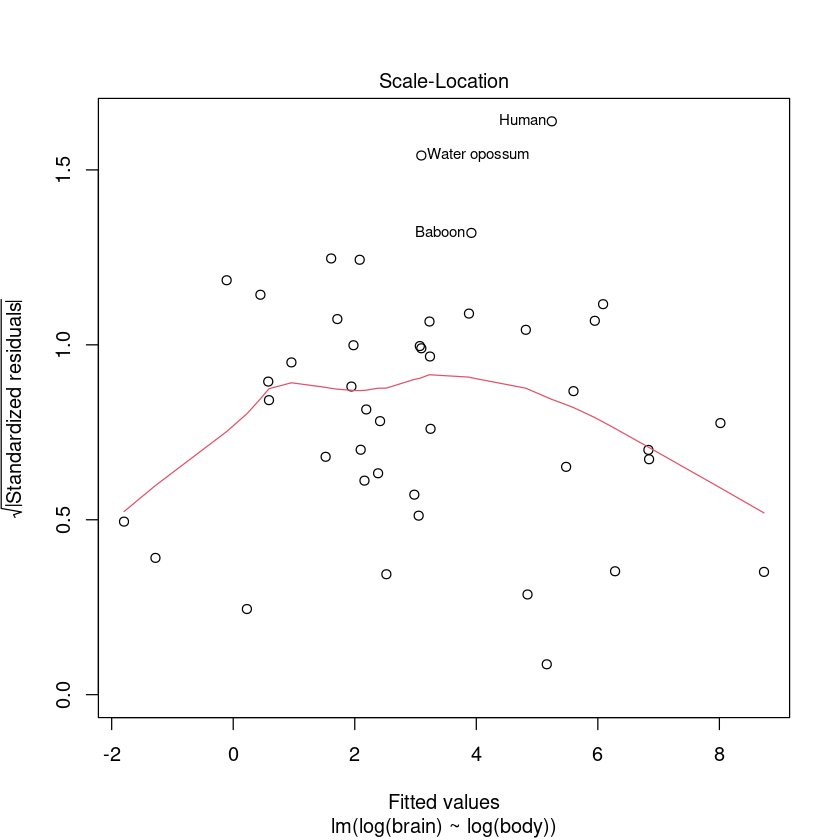

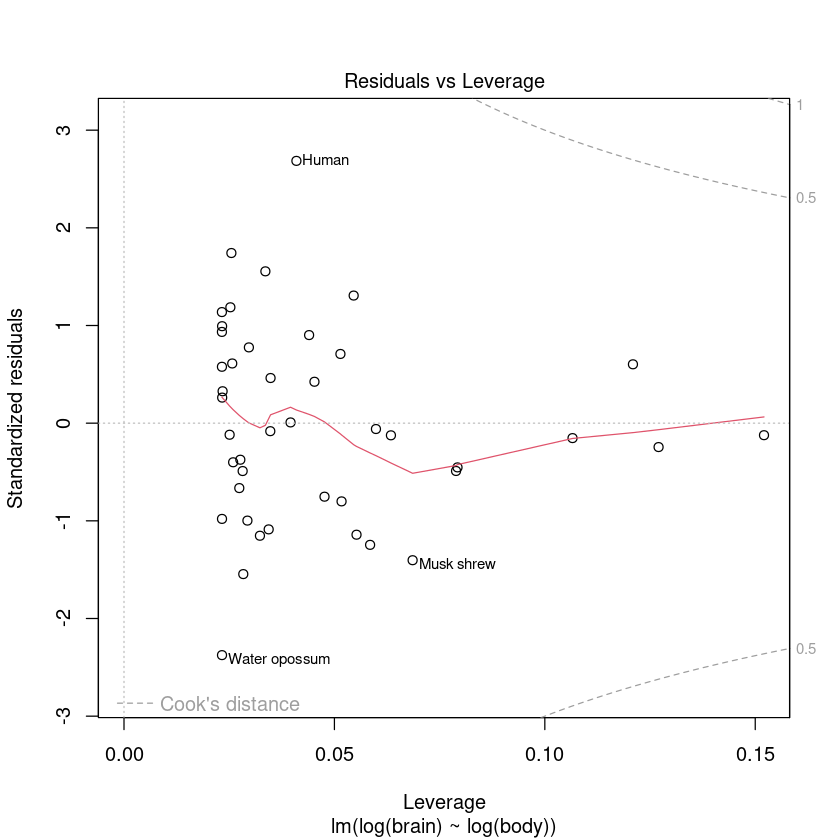

In [14]:
plot(model_log)

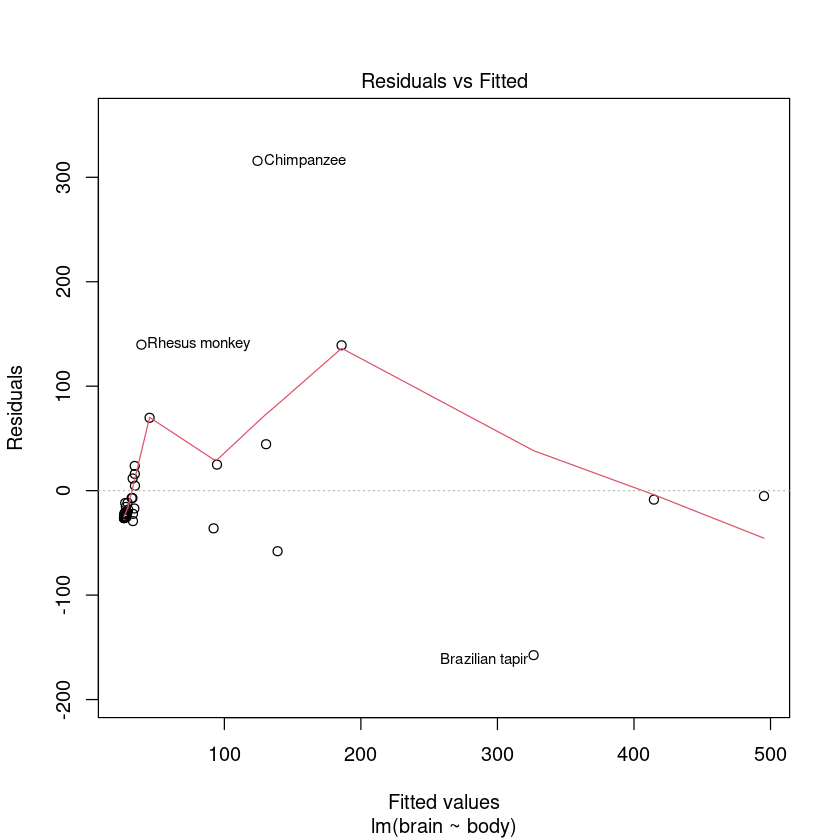

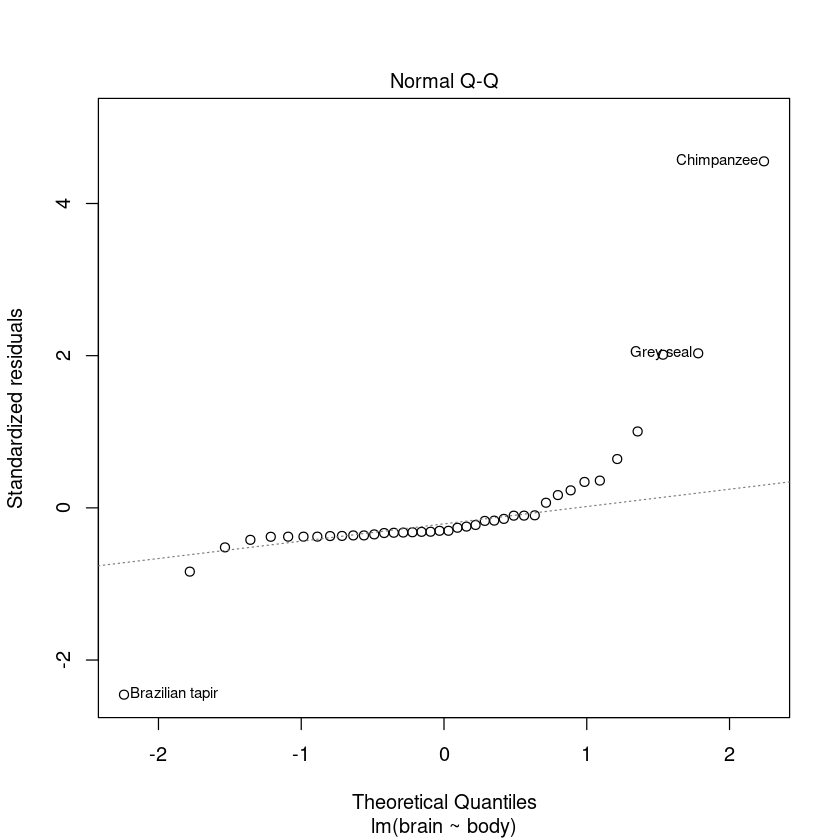

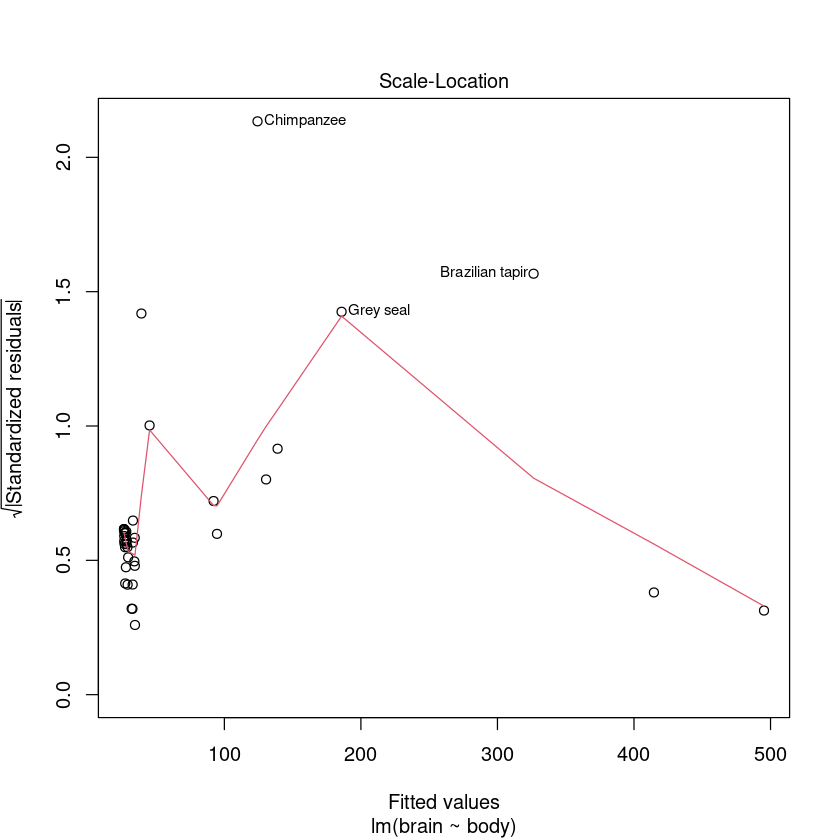

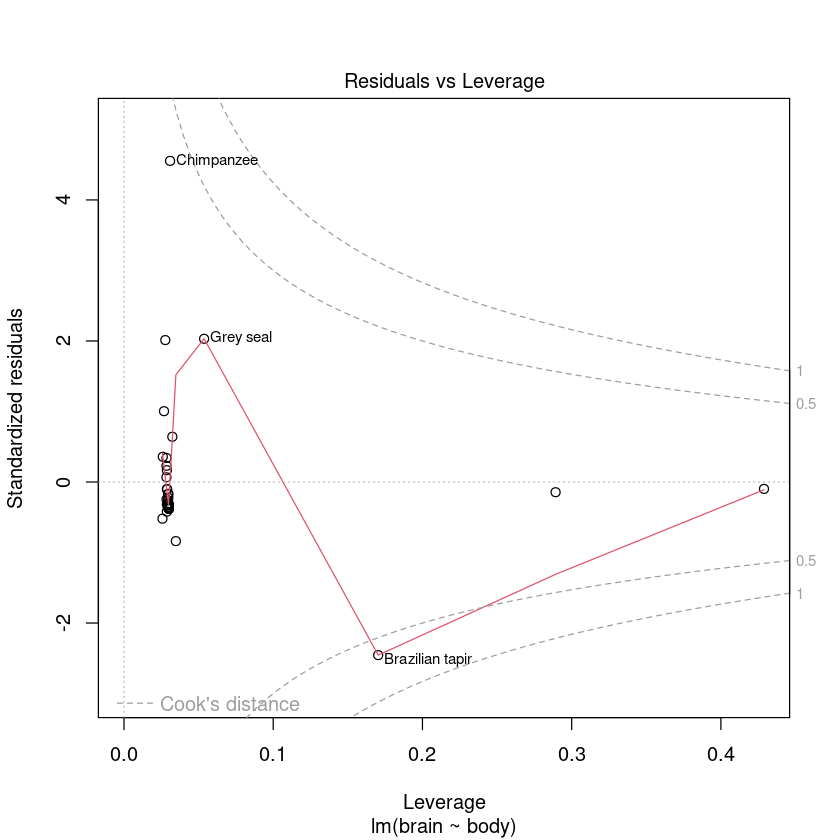

In [16]:
plot(model_2)

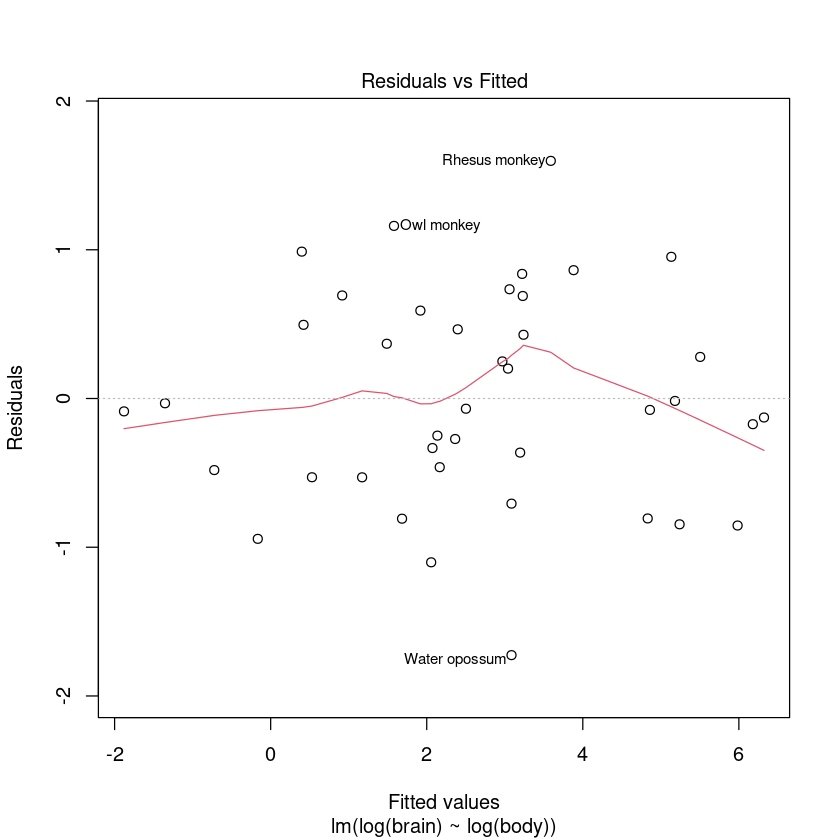

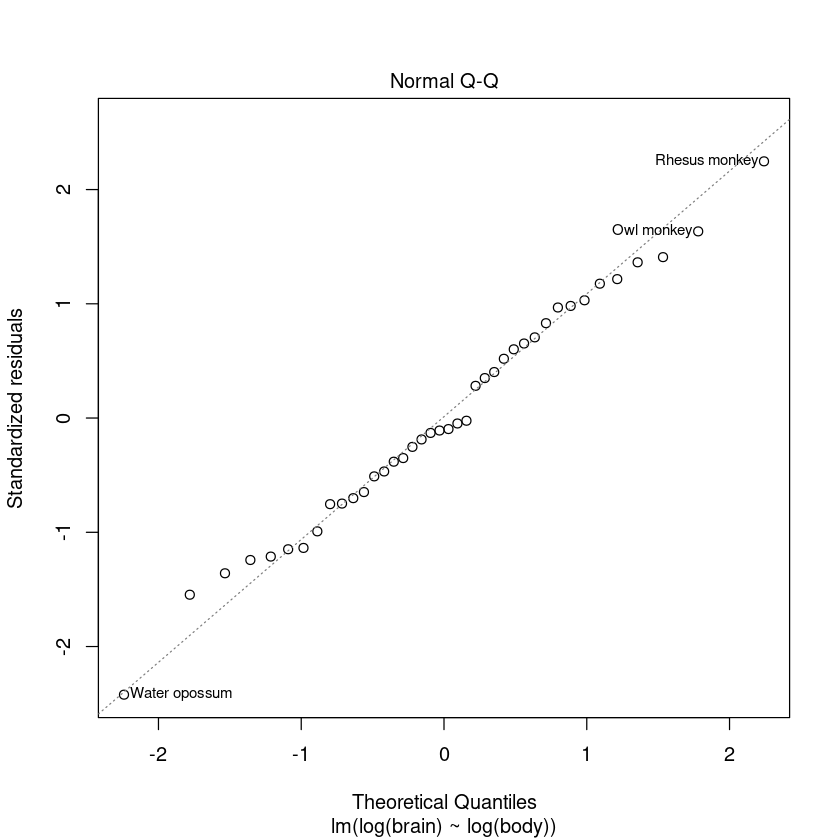

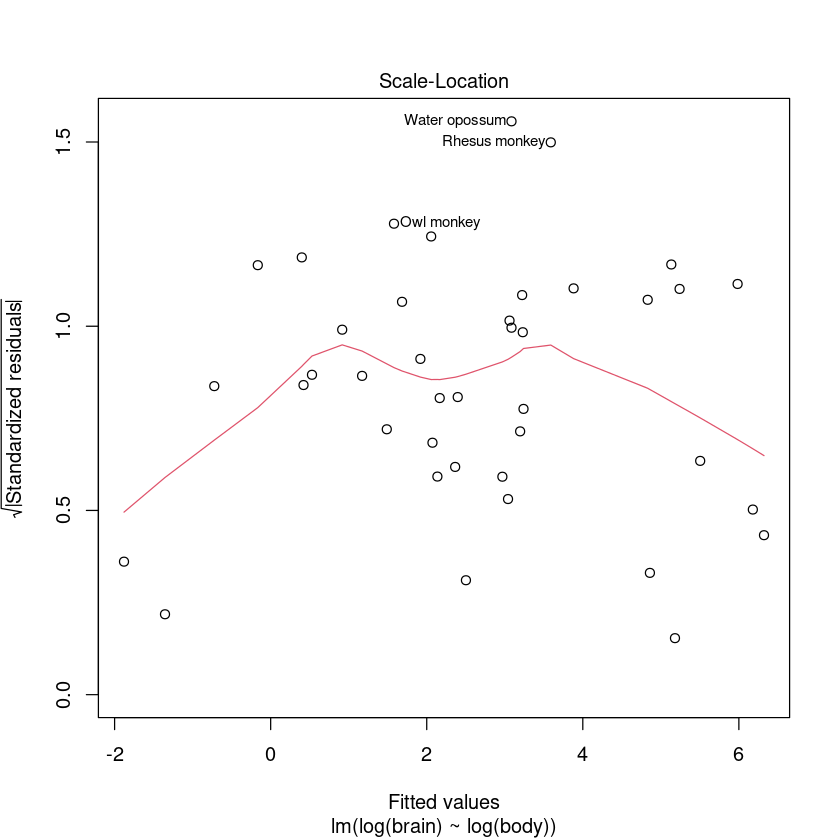

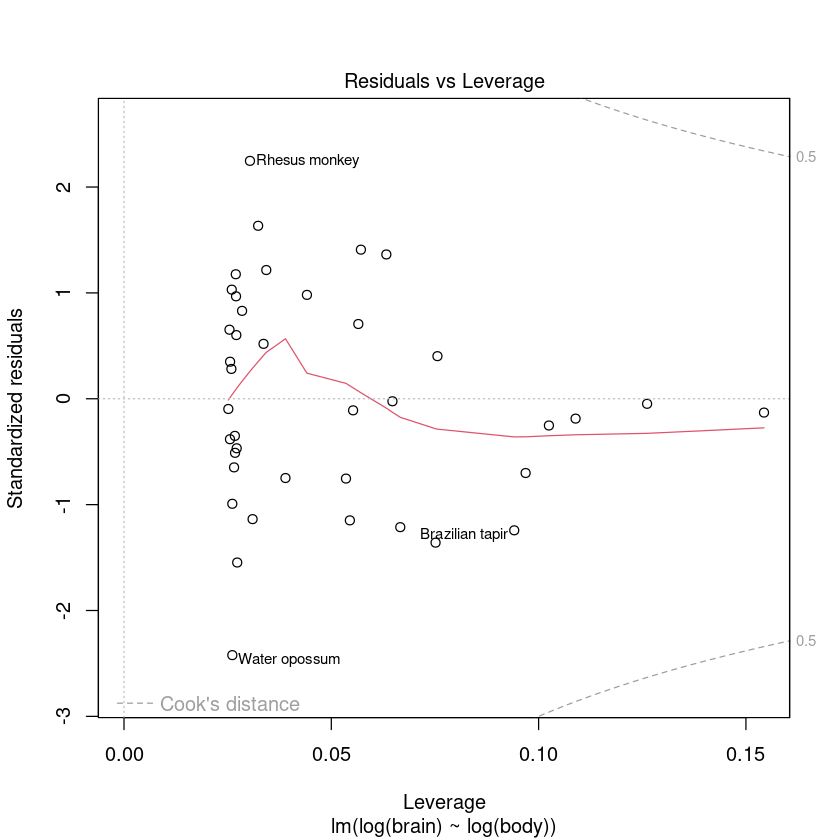

In [18]:
plot(model_log_2)

Якщо подивитись на графіки непрологарифмованих даних, що знаходяться вище можна зробити висновок, що залишки розподілені нормально крім декількох викидів. 
На логогарифмічних - залишки гомоскедастичні та розподілені нормально

In [72]:
library(Metrics)
cat('MAE:\nmodel: ',mae(y_real,predict(model,test)),
     '\nmodel_log:',mae(y_real,predict(model_log,test)),
   '\nnmodel_2:',mae(y_real_2,predict(model_2,test_2)),
   '\nnmodel_log_2',mae(y_real_2,predict(model_log_2,test_2)))

MAE:
model:  99.85858 
model_log: 115.2409 
nmodel_2: 49.80578 
nmodel_log_2 65.934

Висновок:

За результатами наших моделей краще себе показала звичайна модель ,що була тренована на даних без викидів. Можна це побачити дивлячись на метрику мае.